In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//17) Support Vector Machines//SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16205 entries, 0 to 16204
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            16205 non-null  int64 
 1   workclass      16205 non-null  object
 2   education      16205 non-null  object
 3   educationno    16205 non-null  int64 
 4   maritalstatus  16205 non-null  object
 5   occupation     16205 non-null  object
 6   relationship   16205 non-null  object
 7   race           16205 non-null  object
 8   sex            16205 non-null  object
 9   capitalgain    16205 non-null  int64 
 10  capitalloss    16205 non-null  int64 
 11  hoursperweek   16205 non-null  int64 
 12  native         16205 non-null  object
 13  Salary         16205 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [22]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [23]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
print('Shape of dataframe before dropping duplicates',df.shape)


Shape of dataframe before dropping duplicates (16205, 14)


In [25]:
df.drop_duplicates(keep=False,inplace=True)

In [26]:
print('Shape of dataframe after dropping duplicates',df.shape)

Shape of dataframe after dropping duplicates (14225, 14)


In [27]:
df['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [28]:
df.drop('native',axis=1,inplace=True)

In [29]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [30]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-'
 ' Machine-op-inspct' ' Other-service' ' Priv-house-serv'
 ' Prof-specialty' ' Protective-serv' ' Sales' ' Tech-support'
 ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife' 'Husband']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White'
 'White']
[' Female' ' Male' 'Male']
[' <=50K' ' >50K']


In [31]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,10,5,2,0,0,0,40,0


# Feature selection using ExtraTreesClassifier


In [32]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.23409305 0.05288901 0.03770334 0.08876337 0.08165075 0.09404523
 0.09313551 0.01948259 0.02612558 0.10356016 0.03450474 0.13404667]


In [35]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [36]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.234093
hoursperweek     0.134047
capitalgain      0.103560
occupation       0.094045
relationship     0.093136
educationno      0.088763
maritalstatus    0.081651
workclass        0.052889
education        0.037703
capitalloss      0.034505
sex              0.026126
race             0.019483
dtype: float64

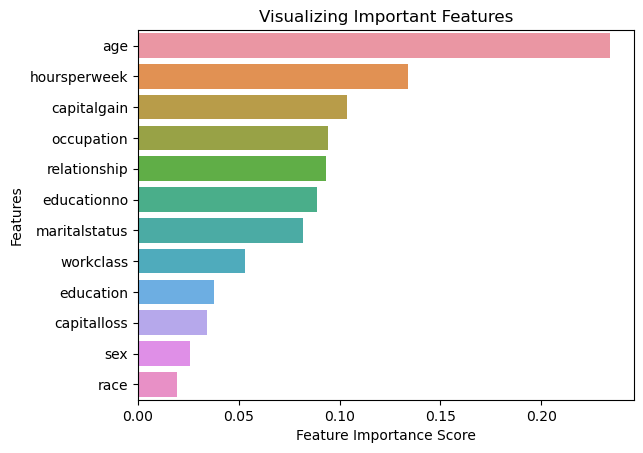

In [37]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [38]:
## Dropping the fivecolumns having least feature importance
df.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [39]:
df.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,10,5,0,40,0


In [40]:
df[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,14225.000000,14225.000000,14225.000000
mean,39.156696,1201.726889,41.175255
std,13.195168,7721.556497,12.351520
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [41]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['age','capitalgain','hoursperweek']] = scaler.fit_transform(df[['age','capitalgain','hoursperweek']])
df.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.011876,13,4,0,1,0.125921,-0.095154,0
1,0.821792,13,2,3,0,-0.155638,-2.281197,0
2,-0.087664,9,0,5,1,-0.155638,-0.095154,0
3,1.049156,7,2,5,0,-0.155638,-0.095154,0
4,-0.845543,13,2,10,5,-0.155638,-0.095154,0


In [42]:
## Checking output variable
df['Salary'].value_counts()

0    10608
1     3617
Name: Salary, dtype: int64

# Creating model of SVC


In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [44]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [45]:
# Defining base model
model=SVC()

# model evaluation method
cv1= StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv1, n_jobs=-1)

# Mean accuracy
print("The mean roc_auc score for base model is:",np.mean(scores))

The mean roc_auc score for base model is: 0.8734026530075439


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [47]:
# Fitting the model and making predictions

svc1= SVC(C=1.0,class_weight='balanced',random_state=50)
svc1.fit(X_train,Y_train)
pred1=svc1.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, pred1,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.94      0.74      0.83      3184
    1-Above 50K       0.53      0.86      0.66      1084

       accuracy                           0.77      4268
      macro avg       0.74      0.80      0.74      4268
   weighted avg       0.84      0.77      0.78      4268



In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, pred1)
conf_matrix1

array([[2357,  827],
       [ 150,  934]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

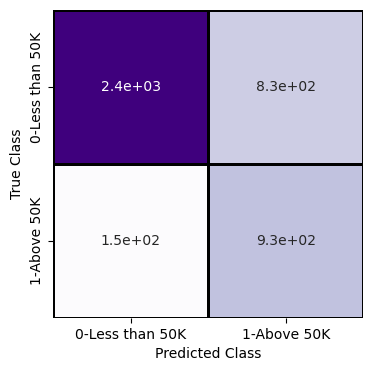

In [50]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

The precision and recall for label 0 is high which shows that the model has effectively predicted maximum of 0 labels with high accuracy.


The recall for label 1 is high(0.87) but the precision is low(0.53).This model has detected target values with label 1 effectively but the accuracy of predicting label 1 is low.